In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./Portfolio-by-Location-by-Debt-Size.csv')
df

,Unnamed: 0,<5K,Unnamed: 2,5K to 10K,Unnamed: 4,10K to 20K,Unnamed: 6,20K to 40K,Unnamed: 8,40K to 60K,Unnamed: 10,60K to 80K,Unnamed: 12,80K to 100K,Unnamed: 14,100K to 200K,Unnamed: 16,200K+,Unnamed: 18
0,Location,Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands)
1,Alabama,$0.28,102.9,$0.76,104.1,$1.84,126.7,$3.95,138.2,$3.29,66.8,$2.84,41.2,$1.97,22.2,$5.25,37.8,$3.70,13.3
2,Alaska,$0.03,11.9,$0.09,12.0,$0.20,13.9,$0.40,14.0,$0.32,6.4,$0.27,3.9,$0.17,1.9,$0.46,3.3,$0.43,1.5
3,Arizona,$0.42,152.7,$1.21,164.0,$2.70,187.8,$5.29,186.0,$4.15,84.5,$3.39,49.2,$2.29,25.7,$6.08,44.2,$6.18,20.1
4,Arkansas,$0.19,69.0,$0.50,68.9,$1.17,80.6,$2.34,82.3,$1.92,38.9,$1.66,24.1,$1.16,13.0,$2.61,19.0,$1.69,6.0
5,California,$1.70,604.6,$5.47,737.4,$12.60,876.8,$22.92,813.0,$15.75,321.9,$12.60,182.7,$9.43,105.7,$30.29,217.0,$35.93,117.3
6,Colorado,$0.33,118.5,$0.93,126.5,$2.31,158.7,$5.08,178.9,$3.90,79.4,$3.21,46.6,$2.15,24.2,$5.80,41.9,$5.11,17.5
7,Connecticut,$0.20,72.2,$0.63,86.1,$1.60,109.6,$3.43,122.4,$2.28,46.4,$1.87,27.1,$1.33,15.0,$3.76,27.3,$3.24,11.0
8,Delaware,$0.05,19.2,$0.16,22.0,$0.39,26.8,$0.84,29.7,$0.61,12.4,$0.54,7.9,$0.40,4.5,$1.15,8.3,$0.85,3.0
9,District of Columbia,$0.04,14.0,$0.12,16.1,$0.30,20.8,$0.69,24.0,$0.60,12.1,$0.56,8.1,$0.46,5.2,$1.71,12.1,$1.88,6.5


In [2]:
states = []
for id, i in enumerate(df['Unnamed: 0']):
    if id == 0: continue
    states.append(i)
print(states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Other', 'Not Reported']


In [3]:
amount_lent = {}
borrowers = {}
avg = {}

for i in df.columns:
    if i[0] == 'U': continue
    else:
        amount_lent[i] = []
        borrowers[i] = []
        avg[i] = []

slabs = list(borrowers.keys())

for i in range(1, 55):
    for id, j in enumerate(df.loc[i, :]):
        if id < 1: continue
        else:
            if (id % 2 == 0): borrowers[slabs[(id // 2) - 1]].append(float(j))
            else: amount_lent[slabs[(id - 1) // 2]].append(float(j[1:]))

for i in slabs:
    for id, j in enumerate(amount_lent[i]):
        avg[i].append(amount_lent[i][id] * 1000 / borrowers[i][id])

avg_df = pd.DataFrame(avg, index=states)
amount_lent_df = pd.DataFrame(amount_lent, index=states)
borrowers_df = pd.DataFrame(borrowers, index=states)

In [4]:
borrowers_df.head()

,<5K,5K to 10K,10K to 20K,20K to 40K,40K to 60K,60K to 80K,80K to 100K,100K to 200K,200K+
Alabama,102.9,104.1,126.7,138.2,66.8,41.2,22.2,37.8,13.3
Alaska,11.9,12.0,13.9,14.0,6.4,3.9,1.9,3.3,1.5
Arizona,152.7,164.0,187.8,186.0,84.5,49.2,25.7,44.2,20.1
Arkansas,69.0,68.9,80.6,82.3,38.9,24.1,13.0,19.0,6.0
California,604.6,737.4,876.8,813.0,321.9,182.7,105.7,217.0,117.3


In [5]:
amount_lent_df.head()

,<5K,5K to 10K,10K to 20K,20K to 40K,40K to 60K,60K to 80K,80K to 100K,100K to 200K,200K+
Alabama,0.28,0.76,1.84,3.95,3.29,2.84,1.97,5.25,3.70
Alaska,0.03,0.09,0.20,0.40,0.32,0.27,0.17,0.46,0.43
Arizona,0.42,1.21,2.70,5.29,4.15,3.39,2.29,6.08,6.18
Arkansas,0.19,0.50,1.17,2.34,1.92,1.66,1.16,2.61,1.69
California,1.70,5.47,12.60,22.92,15.75,12.60,9.43,30.29,35.93


In [6]:
avg_df.head()

,<5K,5K to 10K,10K to 20K,20K to 40K,40K to 60K,60K to 80K,80K to 100K,100K to 200K,200K+
Alabama,2.721088,7.300672,14.522494,28.581766,49.251497,68.932039,88.738739,138.888889,278.195489
Alaska,2.521008,7.500000,14.388489,28.571429,50.000000,69.230769,89.473684,139.393939,286.666667
Arizona,2.750491,7.378049,14.376997,28.440860,49.112426,68.902439,89.105058,137.556561,307.462687
Arkansas,2.753623,7.256894,14.516129,28.432564,49.357326,68.879668,89.230769,137.368421,281.666667
California,2.811776,7.417955,14.370438,28.191882,48.928239,68.965517,89.214759,139.585253,306.308610


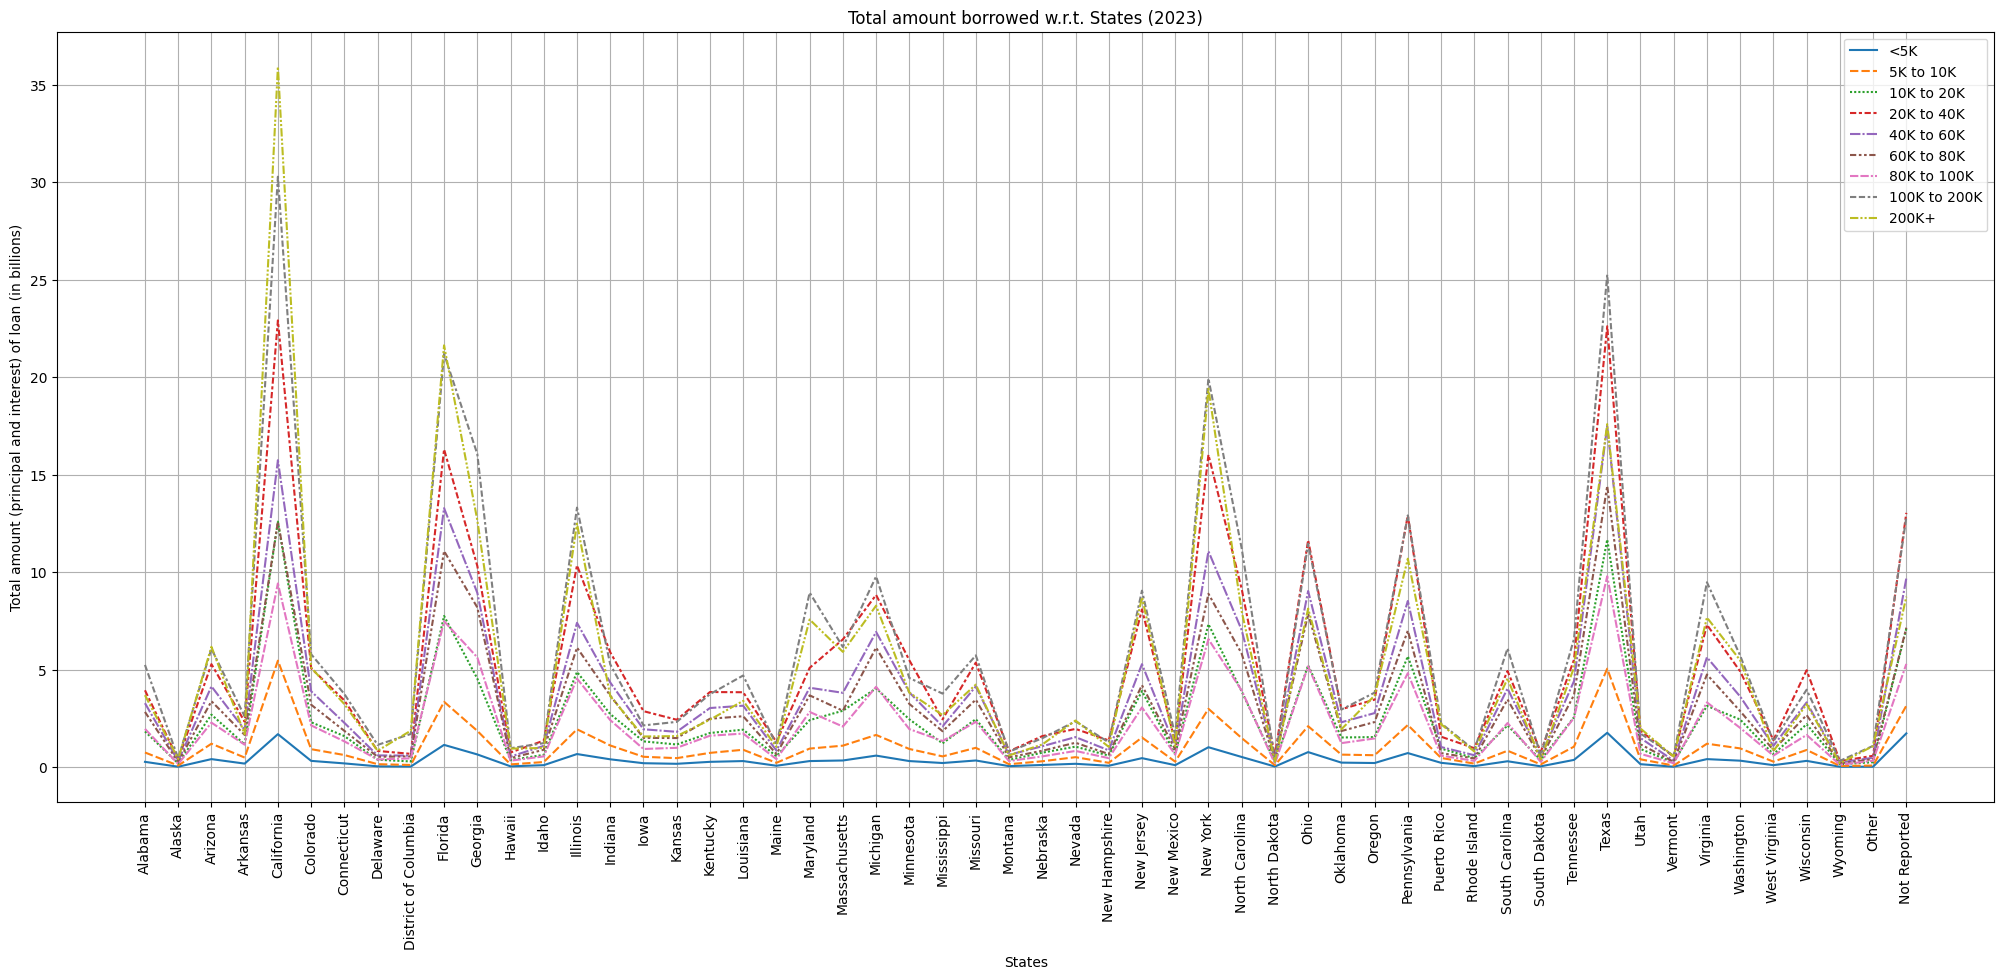

In [27]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=amount_lent_df)
plt.title("Total amount borrowed w.r.t. States (2023)")
plt.ylabel("Total amount (principal and interest) of loan (in billions)")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.grid()
plt.show()

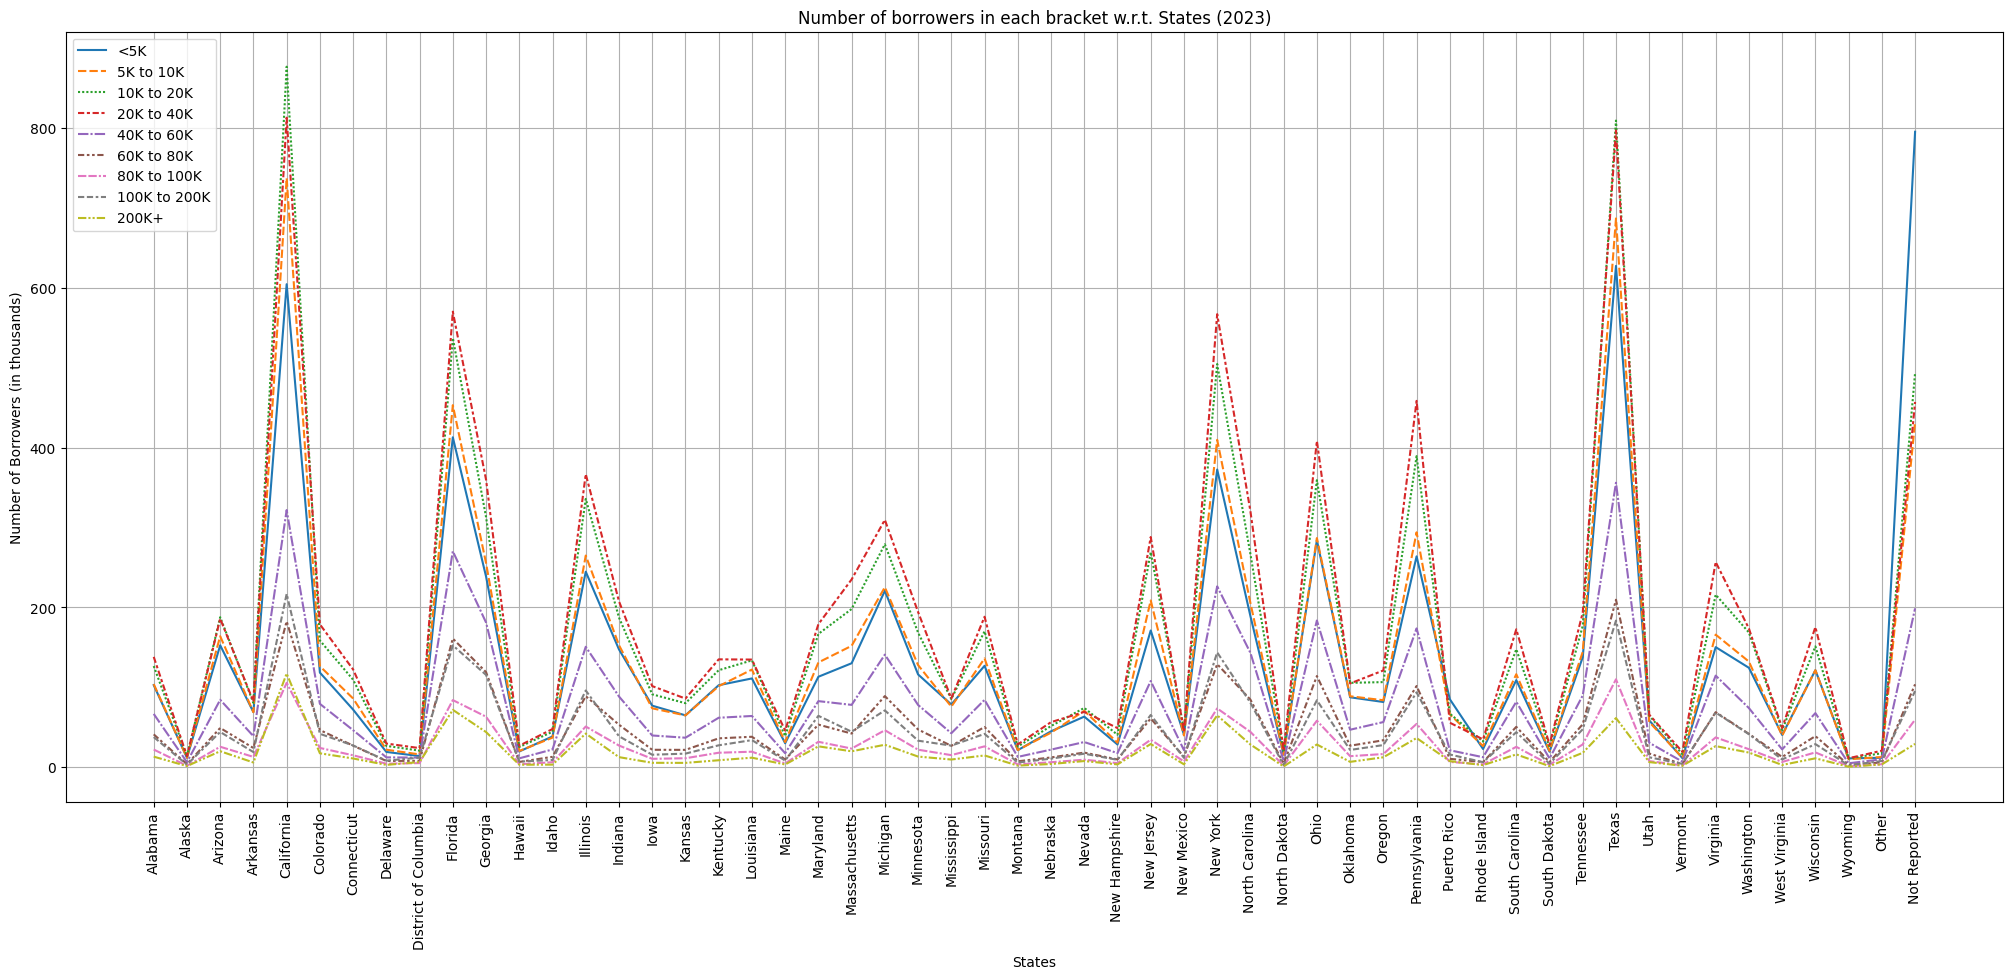

In [28]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=borrowers_df)
plt.title("Number of borrowers in each bracket w.r.t. States (2023)")
plt.xlabel("States")
plt.ylabel("Number of Borrowers (in thousands)")
plt.xticks(rotation=90)
plt.grid()
plt.show()